## Proyecto: Análisis de mercado inmobiliario

### Alumno: Robra Abel Maximiliano

### Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### PARTE A - Tratamiento de Datos

#### Cargamos las librerias necesarias

In [1]:
#Importamos las librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

#### Hacemos una exploración de datos inicial

In [2]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [4]:
print("El dataset tiene " + str(df.shape[0]) + " filas y "+ str(df.shape[1]) + " columnas ")
df.count().sort_values()

El dataset tiene 146660 filas y 19 columnas 


surface_covered    125046
surface_total      126133
lon                136701
lat                136735
bathrooms          140703
start_date         146660
description        146660
title              146660
currency           146660
price              146660
bedrooms           146660
rooms              146660
l3                 146660
l2                 146660
l1                 146660
created_on         146660
end_date           146660
property_type      146660
operation_type     146660
dtype: int64

In [5]:
features_cat_list = ['l1', 'l2', "l3", 'currency', 'property_type', 'operation_type']

In [6]:
for f in features_cat_list:
    print("----------------------> Estamos analizando el feature {} ".format(f))
    print(list(set(df[f].values)))

----------------------> Estamos analizando el feature l1 
['Argentina']
----------------------> Estamos analizando el feature l2 
['Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur', 'Capital Federal', 'Bs.As. G.B.A. Zona Oeste']
----------------------> Estamos analizando el feature l3 
['Moreno', 'Parque Avellaneda', 'Retiro', 'Parque Chas', 'Caballito', 'Parque Chacabuco', 'San Telmo', 'Lanús', 'Versalles', 'Presidente Perón', 'La Plata', 'Constitución', 'Villa Devoto', 'Villa Riachuelo', 'Escobar', 'Almirante Brown', 'Abasto', 'Boca', 'Parque Centenario', 'General San Martín', 'Congreso', 'San Nicolás', 'Chacarita', 'Villa Crespo', 'Tigre', 'Nuñez', 'Ituzaingó', 'Velez Sarsfield', 'Barrio Norte', 'Berazategui', 'Balvanera', 'Marcos Paz', 'Vicente López', 'Merlo', 'Liniers', 'Floresta', 'Colegiales', 'La Matanza', 'San Miguel', 'Villa Pueyrredón', 'Pilar', 'Barracas', 'Puerto Madero', 'Villa Soldati', 'Florencio Varela', 'Avellaneda', 'Villa Ortuzar', 'Belgrano', 'Saavedra', 'José 

<font color=#145A32 >Inicialmente podemos detectar que no todas las columnas son de utilidad, hay valores faltantes que habra que tratar, las columnas categoricas tendran que ser tratadas para ser utilizadas e, incialmente, las variables numericas tienen un comportamiento atipico ya que hay mucha diferencia entre la media y el valor que esta al 50%</font>

#### Eliminamos las columnas que no son de utilidad

<font color=#145A32 >Analizando el listado de valores de variables categoricas, podemos eliminar las columnas l1, currency y operation_type , ya que solo poseen un unico valor. Tambien podemos eliminar las columnas de fechas, titulos, longitud y latitud</font>

In [7]:
columnas_descartables = ['l1', 'operation_type', 'currency']
df = df.drop(columns=columnas_descartables)
print("El dataset tiene " + str(df.shape[0]) + " filas y "+ str(df.shape[1]) + " columnas ")

El dataset tiene 146660 filas y 16 columnas 


In [8]:
columnas_descartables = ['start_date', 'end_date', 'created_on', 'lat', 'lon', 'title', 'description']
df = df.drop(columns=columnas_descartables)
print("El dataset tiene " + str(df.shape[0]) + " filas y "+ str(df.shape[1]) + " columnas ")

El dataset tiene 146660 filas y 9 columnas 


#### Estudiamos las variables categoricas

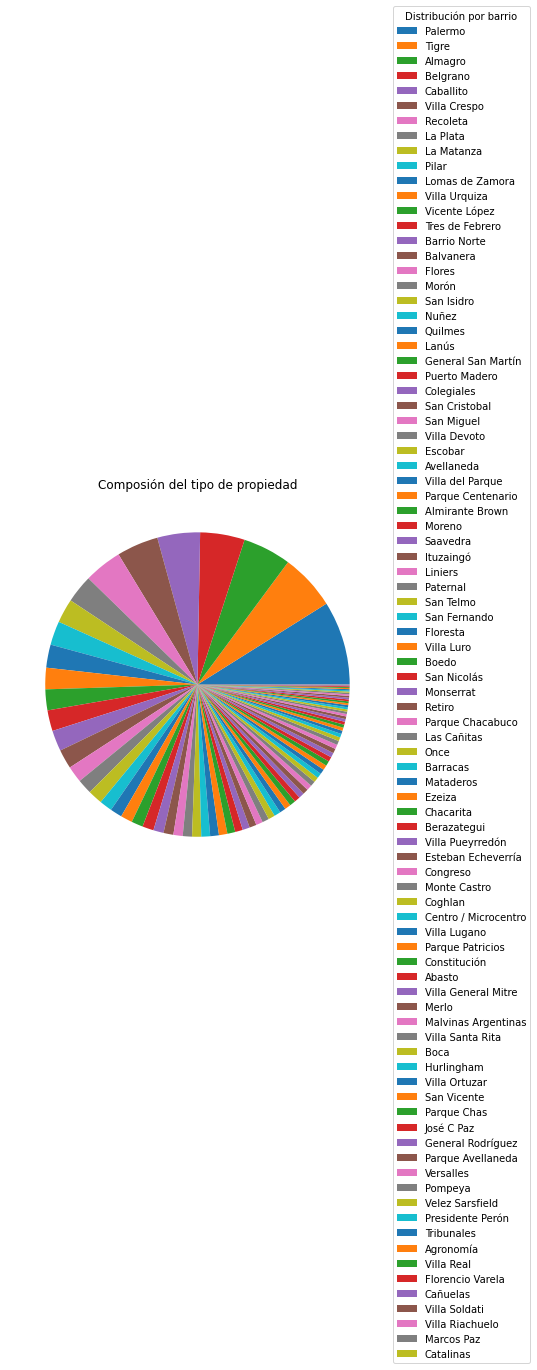

In [9]:
#L3 

tipos_propiedad = df['l3'].value_counts()

data = list(tipos_propiedad)
property_type = list(tipos_propiedad.index)


fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(data)

ax.legend(property_type,
          title="Distribución por barrio",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Composión del tipo de propiedad")

plt.show()


<font color=#145A32 >Dentro de las variables categoricas, la que mas datos tiene es L3. Los datos se distribuyen muy uniformemente entre las variables, por lo cual puede ser clave al momento de usar nuestro modelo.</font>

#### Separamos el set en entrenamiento y testeo para proximos tratamientos

In [10]:
data_train, data_test = train_test_split(df, test_size = 0.3)
print("El tamaño del dataset de entrenamiento" + str(data_train.shape))
print("El tamaño del dataset de testeo" + str(data_test.shape))

El tamaño del dataset de entrenamiento(102662, 9)
El tamaño del dataset de testeo(43998, 9)


#### Estudiamos los valores faltantes

In [11]:
data_train.count().sort_values()

surface_covered     87495
surface_total       88237
bathrooms           98475
l2                 102662
l3                 102662
rooms              102662
bedrooms           102662
price              102662
property_type      102662
dtype: int64

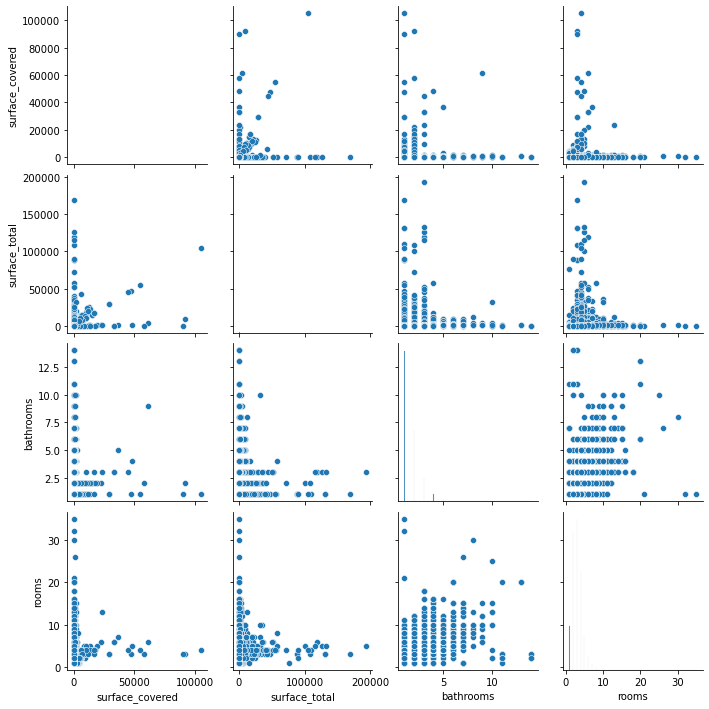

In [12]:
data = pd.concat([data_train['surface_covered'], data_train['surface_total'], data_train['bathrooms'], data_train['rooms']], axis = 1)
sns.pairplot(data)

<font color=#145A32 >En el grafico podemos apreciar que existe cierta relación lineal entre cantidad de baños y cuartos, por lo que usaremos esta relación para la imputación. Considerando la información, usaremos el tipo de propiedad para la imputación de la superficie </font>

#### Imputamos los valores faltantes

In [13]:
group_by_rooms = data_train.groupby('rooms')

In [14]:
# Rellenamos los valores faltantes con la media del dataset de entrenamiento agrupado por rooms

for g in group_by_rooms:
    mask = data_train.rooms == g[0]
    data_train.bathrooms[mask] = data_train.bathrooms[mask].fillna(data_train.bathrooms[mask].median())
for g in group_by_rooms:
    mask = data_test.rooms == g[0]
    mask_1 = data_train.rooms == g[0]
    data_test.bathrooms[mask] = data_test.bathrooms[mask].fillna(data_train.bathrooms[mask_1].median())

<ipython-input-14-2a666f95dda1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.bathrooms[mask] = data_train.bathrooms[mask].fillna(data_train.bathrooms[mask].median())
C:\Users\Abel_\Anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-14-2a666f95dda1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.bathrooms[

<ipython-input-14-2a666f95dda1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.bathrooms[mask] = data_test.bathrooms[mask].fillna(data_train.bathrooms[mask_1].median())
C:\Users\Abel_\Anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-14-2a666f95dda1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.bathrooms[m

In [15]:
group_by_pt = data_train.groupby('property_type')

for p in group_by_pt:
    mask = data_train.property_type == p[0]
    data_train.surface_covered[mask] = data_train.surface_covered[mask].fillna(data_train.surface_covered[mask].mean())
    data_train.surface_total[mask] = data_train.surface_total[mask].fillna(data_train.surface_total[mask].mean())
for p in group_by_pt:
    mask = data_test.property_type == p[0]
    mask_1 = data_train.property_type == p[0]
    data_test.surface_covered[mask] = data_test.surface_covered[mask].fillna(data_train.surface_covered[mask_1].mean())
    data_test.surface_total[mask] = data_test.surface_total[mask].fillna(data_train.surface_total[mask_1].mean())

<ipython-input-15-b46e9562707f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.surface_covered[mask] = data_train.surface_covered[mask].fillna(data_train.surface_covered[mask].mean())
<ipython-input-15-b46e9562707f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.surface_total[mask] = data_train.surface_total[mask].fillna(data_train.surface_total[mask].mean())
<ipython-input-15-b46e9562707f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [16]:
data_train.count().sort_values()

l2                 102662
l3                 102662
rooms              102662
bedrooms           102662
bathrooms          102662
surface_total      102662
surface_covered    102662
price              102662
property_type      102662
dtype: int64

In [17]:
data_test.count().sort_values()

l2                 43998
l3                 43998
rooms              43998
bedrooms           43998
bathrooms          43998
surface_total      43998
surface_covered    43998
price              43998
property_type      43998
dtype: int64

#### Eliminamos los datos restantes que no pudimos imputar

In [18]:
data_train = data_train.dropna()
data_test = data_test.dropna()

#### Estudiamos las variables numericas

#### Realizamos un grafico para ver la distribución de las variables

C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

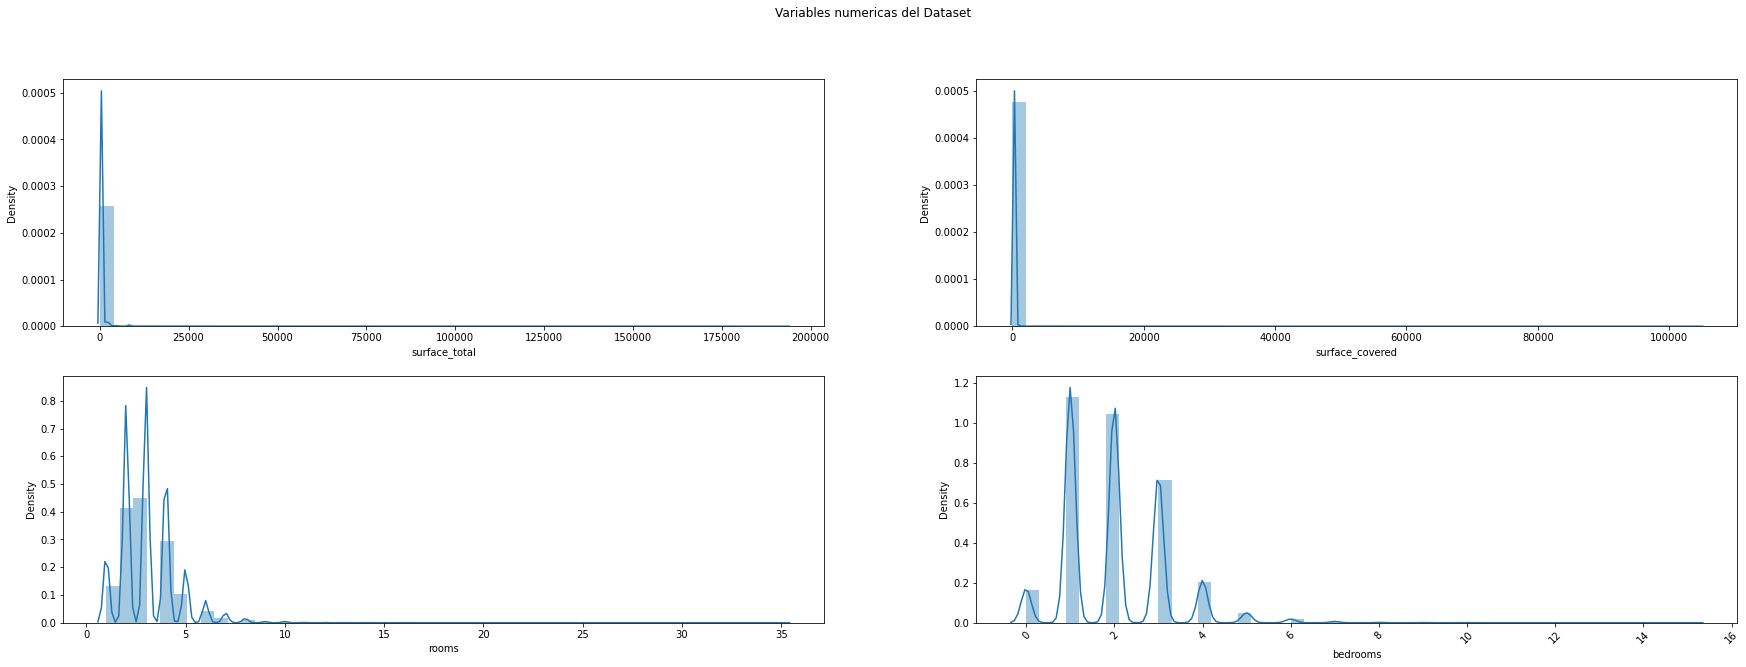

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(30, 10))

fig.suptitle('Variables numericas del Dataset')

sns.distplot(ax=axes[0, 0], a=data_train['surface_total'])
sns.distplot(ax=axes[0, 1], a=data_train['surface_covered'])
sns.distplot(ax=axes[1, 0], a=data_train['rooms'])
sns.distplot(ax=axes[1, 1], a=data_train['bedrooms'])


plt.xticks(rotation=45)
plt.show()


<font color=#145A32 >Los graficos muestran que todos los datos tienen un sesgo hacia la derecha y no tienen una distribución normal utilizaremos el rango intercuartilico como criterio para eliminar</font>

#### Eliminamos los Outliers

#### Dataset de entrenamiento 

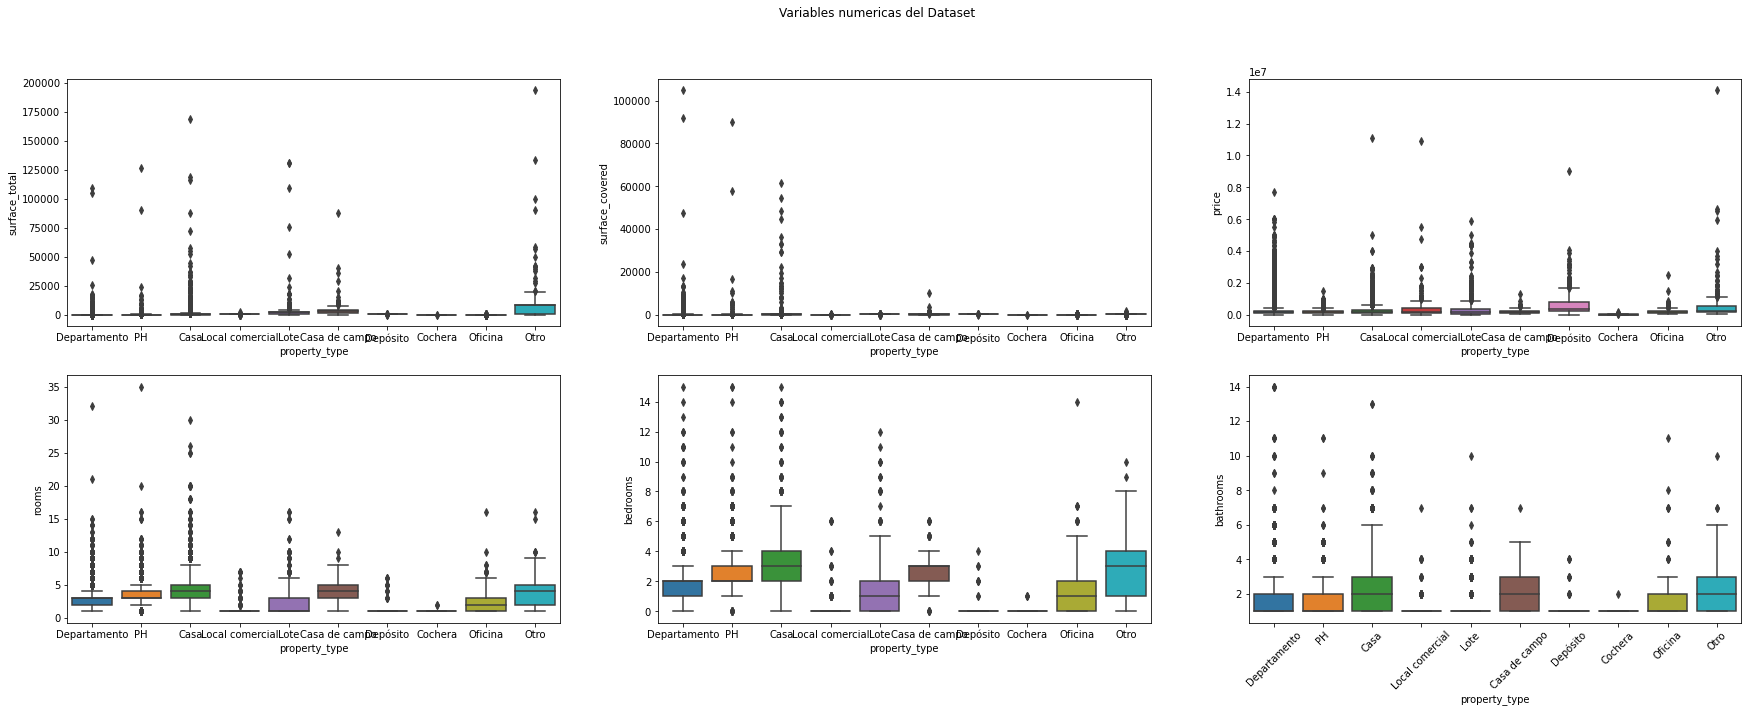

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10))

fig.suptitle('Variables numericas del Dataset')

sns.boxplot(ax=axes[0, 0], data=data_train, x='property_type', y='surface_total')
sns.boxplot(ax=axes[0, 1], data=data_train, x='property_type', y="surface_covered")
sns.boxplot(ax=axes[0, 2], data=data_train, x='property_type', y="price")
sns.boxplot(ax=axes[1, 0], data=data_train, x='property_type', y='rooms')
sns.boxplot(ax=axes[1, 1], data=data_train, x='property_type', y='bedrooms')
sns.boxplot(ax=axes[1, 2], data=data_train, x='property_type', y='bathrooms')

plt.xticks(rotation=45)
plt.show()


In [21]:
features_num_list = ['surface_total', 'surface_covered', "price", 'rooms', 'bedrooms', 'bathrooms']
property_type_list = data_train['property_type'].values
property_type_list = list(set(property_type_list)) #Eliminamos valores repetidos

for features in features_num_list:
    
    for property_type in property_type_list:
    
        # Esta es la forma de calculo Rango Intercuartílico
        
        q25,q75 = np.percentile(data_train[features][data_train.property_type == property_type], [25,75])
        iqr = q75 - q25
        minimo = q25 - 1.5*iqr
        maximo = q75 + 1.5*iqr
        mascara_min = (data_train.property_type == property_type) & (data_train[features] < minimo)
        mascara_max = (data_train.property_type == property_type) & (data_train[features] > maximo)
        data_train.drop(data_train[mascara_min|mascara_max].index, inplace = True)




In [22]:
print("El dataset tiene " + str(data_train.shape[0]) + " filas y "+ str(data_train.shape[1]) + " columnas ")

El dataset tiene 85766 filas y 9 columnas 


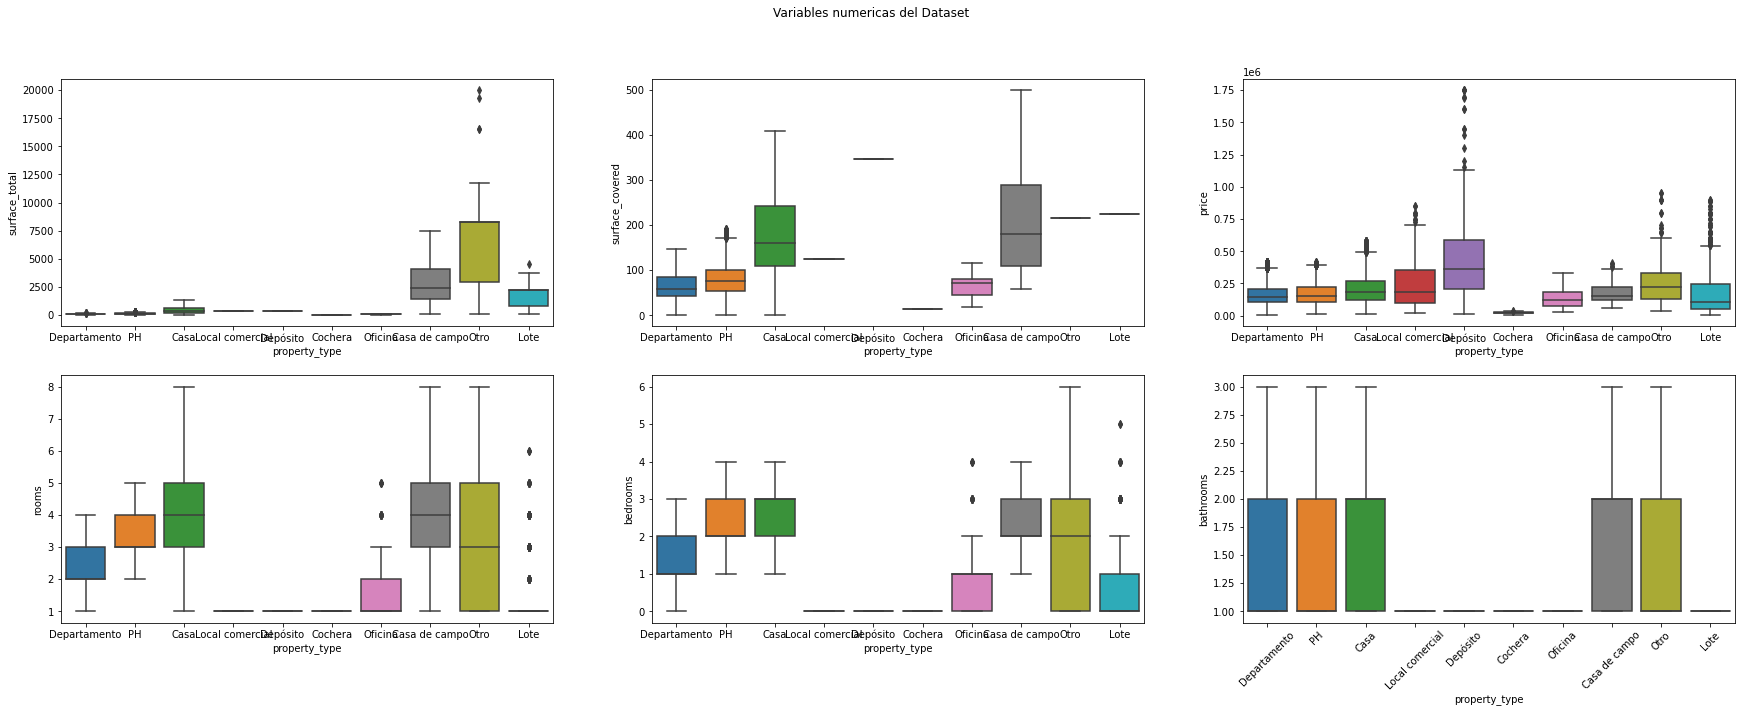

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10))

fig.suptitle('Variables numericas del Dataset')

sns.boxplot(ax=axes[0, 0], data=data_train, x='property_type', y='surface_total')
sns.boxplot(ax=axes[0, 1], data=data_train, x='property_type', y="surface_covered")
sns.boxplot(ax=axes[0, 2], data=data_train, x='property_type', y="price")
sns.boxplot(ax=axes[1, 0], data=data_train, x='property_type', y='rooms')
sns.boxplot(ax=axes[1, 1], data=data_train, x='property_type', y='bedrooms')
sns.boxplot(ax=axes[1, 2], data=data_train, x='property_type', y='bathrooms')

plt.xticks(rotation=45)
plt.show()


#### Dataset de testeo

In [24]:
features_num_list = ['surface_total', 'surface_covered', "price", 'rooms', 'bedrooms', 'bathrooms']
property_type_list = data_train['property_type'].values
property_type_list = list(set(property_type_list)) #Eliminamos valores repetidos

for features in features_num_list:
    
    for property_type in property_type_list:
    
        # Esta es la forma de calculo Rango Intercuartílico
        
        q25,q75 = np.percentile(data_train[features][data_train.property_type == property_type], [25,75])
        iqr = q75 - q25
        minimo = q25 - 1.5*iqr
        maximo = q75 + 1.5*iqr
        mascara_min = (data_test.property_type == property_type) & (data_test[features] < minimo)
        mascara_max = (data_test.property_type == property_type) & (data_test[features] > maximo)
        data_test.drop(data_test[mascara_min|mascara_max].index, inplace = True)



#### Analizamos los datos ya con la imputación de valores missing y despues del tratamiento de datos atipicos 

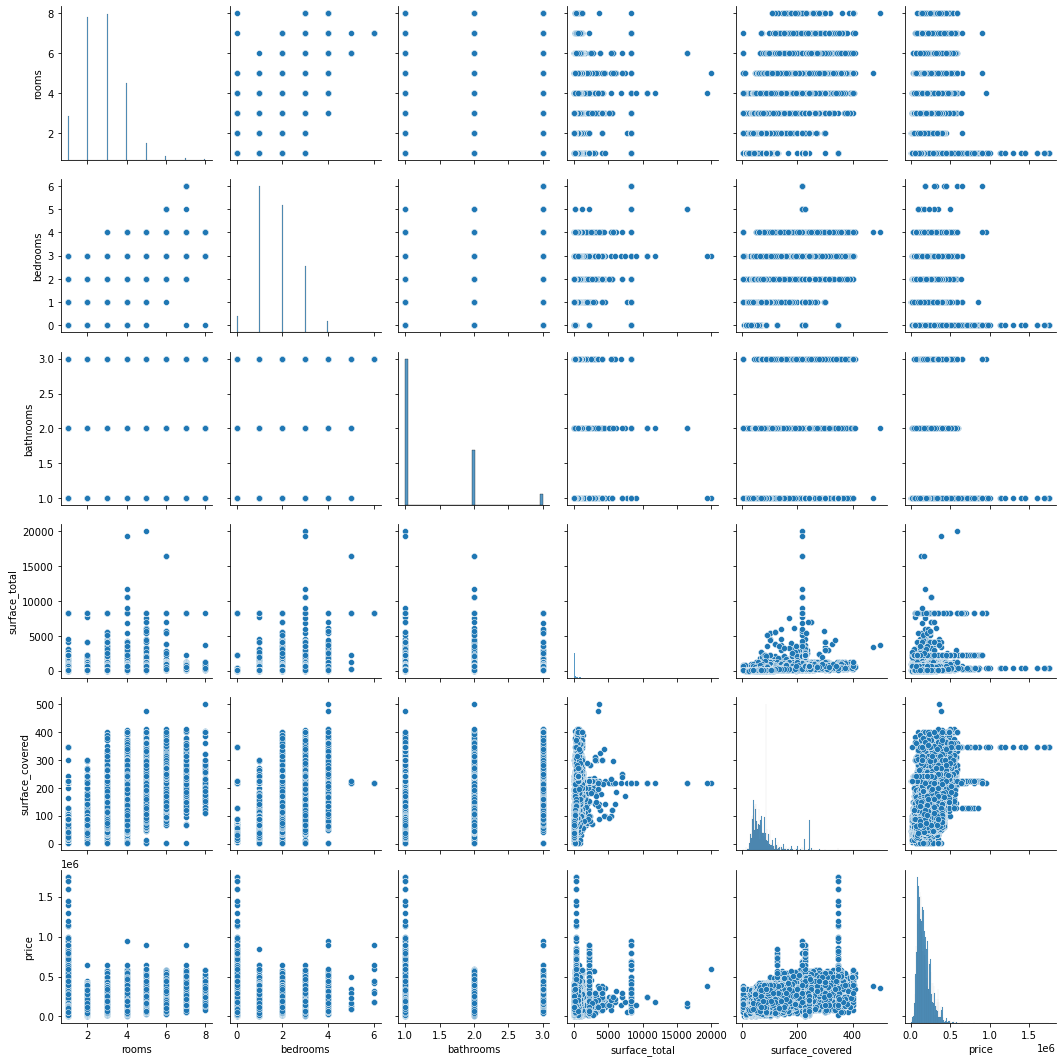

In [25]:
sns.pairplot(data_train)

#### Realizamos un encoder de las variables categoricas 

In [26]:
df.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Aqui hacemos el dataset entrenamiento

le = LabelEncoder()
le.fit(df['l3'])
data_train['l3'] = le.transform(data_train['l3'])
data_test['l3'] = le.transform(data_test['l3'])

In [28]:
from pandas.api.types import CategoricalDtype 

# Realizamos columnas Dummy con el tipo de propiedad

data_train["property_type"] = df["property_type"].astype(CategoricalDtype(list(set(df['property_type'].values))))

property_type_df = pd.get_dummies(data_train["property_type"],prefix='property_type')

# Realizamos columnas Dummy con el lugar


data_train["l2"] = df["l2"].astype(CategoricalDtype(list(set(df['l2'].values))))

l2_df = pd.get_dummies(data_train["l2"],prefix='l2')


data_train = data_train.drop(["l2"], axis = 1)
data_train = data_train.drop(["property_type"], axis = 1)
data_train = pd.concat([data_train, l2_df, property_type_df], axis = 1) 

data_train.shape

(85766, 21)

In [29]:
from pandas.api.types import CategoricalDtype 

# Realizamos columnas Dummy con el tipo de propiedad

data_test["property_type"] = df["property_type"].astype(CategoricalDtype(list(set(df['property_type'].values))))

property_type_df = pd.get_dummies(data_test["property_type"],prefix='property_type')

# Realizamos columnas Dummy con el lugar


data_test["l2"] = df["l2"].astype(CategoricalDtype(list(set(df['l2'].values))))

l2_df = pd.get_dummies(data_test["l2"],prefix='l2')


data_test = data_test.drop(["l2"], axis = 1)
data_test = data_test.drop(["property_type"], axis = 1)
data_test = pd.concat([data_test, l2_df, property_type_df], axis = 1) 

data_test.shape

(35431, 21)

<font color=#145A32 >Con los datos en variables numericas, podemos escalar los datos para compararlo con el modelo presentado en el proyecto 1</font>

#### Escalamos los datos

In [30]:
df_features = data_train.drop(['price'], axis = 1)
data_train_scaler = StandardScaler().fit_transform(df_features.values)
data_train_scaler

array([[ 0.88599977,  0.22220896,  0.26667092, ..., -0.33241275,
        -0.04443386, -0.06022954],
       [ 0.1962222 , -0.7074483 , -0.83913084, ...,  3.00830816,
        -0.04443386, -0.06022954],
       [-0.37859244,  1.15186622,  0.26667092, ..., -0.33241275,
        -0.04443386, -0.06022954],
       ...,
       [ 1.26920953, -0.7074483 , -0.83913084, ..., -0.33241275,
        -0.04443386, -0.06022954],
       [-0.41691342,  1.15186622,  1.37247267, ..., -0.33241275,
        -0.04443386, -0.06022954],
       [ 0.46446903, -0.7074483 , -0.83913084, ..., -0.33241275,
        -0.04443386, -0.06022954]])

In [31]:
df_features = data_test.drop(['price'], axis = 1)
data_test_scaler = StandardScaler().fit_transform(df_features.values)
data_test_scaler

array([[ 0.0895841 , -0.71893904, -0.85270646, ..., -0.33452895,
        -0.04574864, -0.06068456],
       [-1.55302427, -0.71893904, -0.85270646, ..., -0.33452895,
        -0.04574864, -0.06068456],
       [-0.36881824,  3.08523197,  1.39648339, ..., -0.33452895,
        -0.04574864, -0.06068456],
       ...,
       [-0.40701843,  1.18314647,  1.39648339, ..., -0.33452895,
        -0.04574864, -0.06068456],
       [ 1.04458897,  0.23210371,  0.27188846, ..., -0.33452895,
        -0.04574864, -0.06068456],
       [-1.43842369, -0.71893904, -0.85270646, ..., -0.33452895,
        -0.04574864, -0.06068456]])

#### Comparación de los resultados con respecto al proyecto 1

#### Armamos los datos según la indicación del primer proyecto

In [32]:
#Cargamos nuevamente el dataset

df1 = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

# Establecemos las mascaras con las condiciones

mascara_region = (df1.l2 == 'Capital Federal')
mascara_tipo = df1.property_type.isin(['Departamento', 'Casa', 'PH'])
mascara_suptotal = (df1.surface_total >= 15) & (df1.surface_total <= 1000)
mascara_price = (df1.price <= 4000000)
df1 = df1[mascara_region & mascara_tipo & mascara_suptotal & mascara_price]

#Concatenamos las columnas que queremos en un nuevo dataframe

df1 = pd.concat(
     [df1['bedrooms'], 
     df1['bathrooms'] ,
     df1['surface_total'], 
     df1['surface_covered'], 
     df1['rooms'], 
     df1['price']], 
    axis=1)

#Eliminamos las filas con valores nulos con el siguiente metodo

df1 = df1.dropna()
df1.shape

(81019, 6)

#### Comparamos los modelos

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Definimos X e y
X = df1.drop("price", axis = 1)
y = df1["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

tree_regressor = DecisionTreeRegressor(max_depth=8)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

MODELO CON DATOS DEL PRIMER PROYECTO
Modelo: Árbol de Decisión
El error MAE medio en Train: 67271.32127477201
El error RMSE medio en Train: 19793399799.843792
El error MAE medio en Test: 70304.45292512854
El error RMSE medio en Test: 24839736959.92294


C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


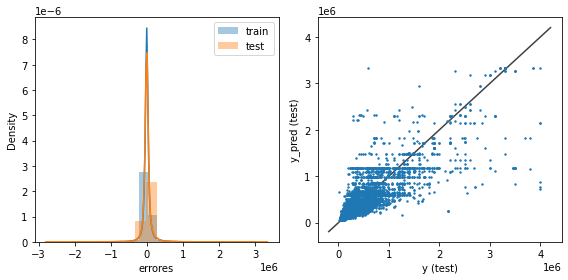

Modelo: Vecinos más cercanos
El error MAE medio en Train: 51500.249378449385
El error RMSE medio en Train: 15081940391.628387
El error MAE medio en Test: 61920.74333086481
El error RMSE medio en Test: 22623546717.255566


C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


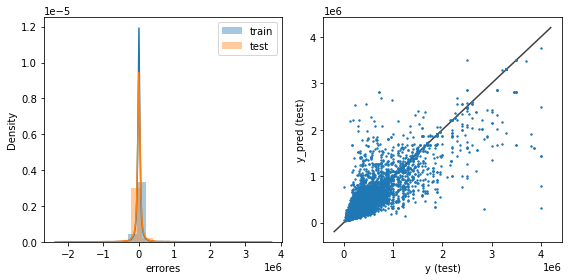

In [34]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

print('MODELO CON DATOS DEL PRIMER PROYECTO')

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')
    
    msa_train = mean_absolute_error(y_train, y_train_pred)
    msa_test = mean_absolute_error(y_test, y_test_pred)
    msa_train_sq = mean_squared_error(y_train, y_train_pred)
    msa_test_sq = mean_squared_error(y_test, y_test_pred)
    print(f'El error MAE medio en Train: {msa_train}')
    print(f'El error RMSE medio en Train: {msa_train_sq}')
    print(f'El error MAE medio en Test: {msa_test}')
    print(f'El error RMSE medio en Test: {msa_test_sq}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

#### Mismo modelo con los datos nuevos

In [35]:
tree_regressor = DecisionTreeRegressor(max_depth=8)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
tree_regressor.fit(data_train.drop(['price'], axis = 1), data_train['price'])
knn_regressor.fit(data_train.drop(['price'], axis = 1), data_train['price'])

X_train = data_train.drop(['price'], axis = 1)
X_test = data_test.drop(['price'], axis = 1)
y_train = data_train['price']
y_test = data_test['price']



MODELO CON DATOS ACTUALES
Modelo: Árbol de Decisión
El error MAE medio en Train: 38889.01220782732
El error RMSE medio en Train: 3166995008.5843544
El error MAE medio en Test: 36528.07842166169
El error RMSE medio en Test: 2505465013.401402


C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


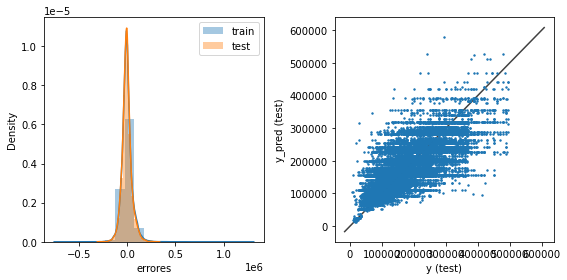

Modelo: Vecinos más cercanos
El error MAE medio en Train: 26720.220574586667
El error RMSE medio en Train: 2093776981.9560156
El error MAE medio en Test: 29679.670576613702
El error RMSE medio en Test: 2177322013.0407505


C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


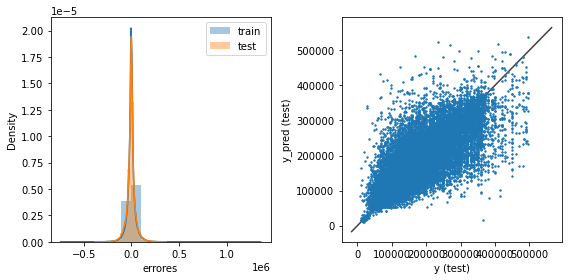

In [36]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

print('MODELO CON DATOS ACTUALES')

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')
    
    msa_train = mean_absolute_error(y_train, y_train_pred)
    msa_test = mean_absolute_error(y_test, y_test_pred)
    msa_train_sq = mean_squared_error(y_train, y_train_pred)
    msa_test_sq = mean_squared_error(y_test, y_test_pred)
    print(f'El error MAE medio en Train: {msa_train}')
    print(f'El error RMSE medio en Train: {msa_train_sq}')
    print(f'El error MAE medio en Test: {msa_test}')
    print(f'El error RMSE medio en Test: {msa_test_sq}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

<font color=#145A32 >Comparando ambos modelos podemos notar una gran diferencia con respecto al error, en este caso usando la metrica de MAE, llegando a tener casi la mitad con respecto a los valores presentados en el primer proyecto. Con esto realizado pasamos a crear modelos mas avanzados</font>

### PARTE B - Modelos Avanzados

#### Modelo avanzado: Gradient Boosting for regression

<font color=#145A32 >El primer modelo avanzado que vamos a entrenar sera RandomForest, inicialmente tomaremos sus argumentos por defecto.</font>

In [37]:
gb = GradientBoostingRegressor()

In [38]:
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [39]:
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

msa_train = mean_absolute_error(y_train, y_train_pred)
msa_test = mean_absolute_error(y_test, y_test_pred)
print(f'El error MAE medio en Train: {msa_train}')
print(f'El error MAE medio en Test: {msa_test}')

El error MAE medio en Train: 36614.603423937675
El error MAE medio en Test: 33787.095302110494


#### Optimización del modelo Gradient Boosting 

<font color=#145A32 >Para optimizar el modelo vamos a realizar una validación cruzada y un gradient search.</font>

In [43]:
param_grid = {
    'n_estimators': [50, 150],
    'max_depth': [4, 5],
}

In [44]:
gb_cv = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='neg_mean_absolute_error', n_jobs=-1)

In [45]:
gb_cv.fit(X_train,y_train) 

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5], 'n_estimators': [50, 150]},
             scoring='neg_mean_absolute_error')

In [46]:
best_model = gb_cv.best_estimator_

In [47]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

msa_train = mean_absolute_error(y_train, y_train_pred)
msa_test = mean_absolute_error(y_test, y_test_pred)
print(f'El error MAE medio en Train: {msa_train}')
print(f'El error MAE medio en Test: {msa_test}')

El error MAE medio en Train: 31665.761595222473
El error MAE medio en Test: 29813.983928836744


In [48]:
mae = {}
mae['gradient_boosting'] = -cross_val_score(estimator=best_model, X=X_train, y=y_train, scoring='neg_mean_absolute_error', cv= 5, n_jobs=-1)

In [49]:
mae = pd.DataFrame.from_dict(mae)

In [50]:
mae

,gradient_boosting
0,32193.608050
1,32799.306537
2,33171.872713
3,32511.554514
4,32160.204768


<font color=#145A32 >Si bien hay una mejora optimizando hiperparametros, el valor del error no se modifica demasiado. Por otro lado, al hacer una validación cruzada podemos ver que no existe mucha diferencia con los resultados, por lo que podemos deducir que los datos tienen una distribución uniforme.</font>

#### Modelo avanzado: Random Forest 

<font color=#145A32 >El segundo modelo avanzado que vamos a entrenar sera RandomForest, inicialmente tomaremos sus argumentos por defecto.</font>

In [51]:
rt = RandomForestRegressor(n_jobs=-1)
rt.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [52]:
y_train_pred = rt.predict(X_train)
y_test_pred = rt.predict(X_test)

msa_train = mean_absolute_error(y_train, y_train_pred)
msa_test = mean_absolute_error(y_test, y_test_pred)
msa_train_sq = mean_squared_error(y_train, y_train_pred)
msa_test_sq = mean_squared_error(y_test, y_test_pred)
print(f'El error MAE medio en Train: {msa_train}')
print(f'El error RMSE medio en Train: {msa_train_sq}')
print(f'El error MAE medio en Test: {msa_test}')
print(f'El error RMSE medio en Test: {msa_test_sq}')

El error MAE medio en Train: 14457.84847280889
El error RMSE medio en Train: 870971791.6572542
El error MAE medio en Test: 22458.44567334529
El error RMSE medio en Test: 1334465563.5258992


<font color=#145A32 >Inicialmente podemos detectar 2 grandes conclusiones:
1. El error, medido en RMSE o MAE baja con respecto al arbol de decisión o el modelo de vecinos mas cercanos
2. Existe Overfitting inicialmente, pero que se puede corregir con la optimización de hiperparametros</font>

#### Optimización del modelo Random Forest

<font color=#145A32 >Para la optimización del modelo primero vamos a activar el "obb_score" el cual ayuda a reducir el error por generalización, que por defecto esta en false.
    El otro Atributo a utlizar sera el numero de estimadores, el cual a traves de un bucle for estudiaremos cual tiene mejor comportamiento tomando diferentes metricas de evaluación</font>

In [53]:
scores_train = []
scores_test = []
scores_train_1 = []
scores_test_1 = []
obb_scores = []
cantidad = np.arange(100,1200,300)
for n_estimators in cantidad:
    rt = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=n_estimators)
    rt.fit(X_train,y_train)
    
    y_train_pred = rt.predict(X_train)
    y_test_pred = rt.predict(X_test)
    
    scores_train.append(mean_squared_error(y_train, y_train_pred))
    scores_test.append(mean_squared_error(y_test, y_test_pred))
    
    scores_train_1.append(mean_absolute_error(y_train, y_train_pred))
    scores_test_1.append(mean_absolute_error(y_test, y_test_pred))
    
    obb_scores.append(rt.oob_score_)

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

scores_train_1 = np.array(scores_train_1)
scores_test_1 = np.array(scores_test_1)

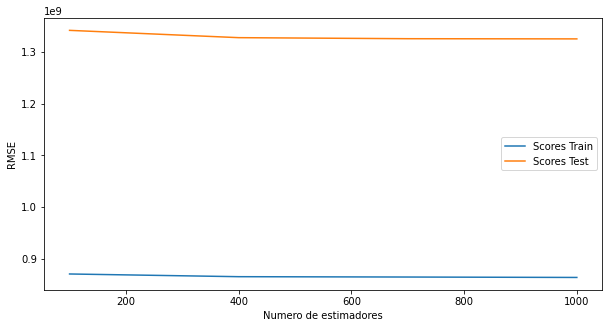

In [54]:
plt.figure(figsize=(10,5))
plt.plot(cantidad,scores_train, label = 'Scores Train')
plt.plot(cantidad,scores_test, label = 'Scores Test')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Numero de estimadores')
plt.show()

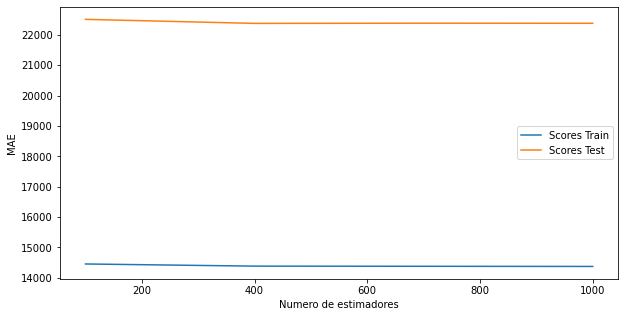

In [55]:
plt.figure(figsize=(10,5))
plt.plot(cantidad,scores_train_1, label = 'Scores Train')
plt.plot(cantidad,scores_test_1, label = 'Scores Test')
plt.legend()
plt.ylabel('MAE')
plt.xlabel('Numero de estimadores')
plt.show()

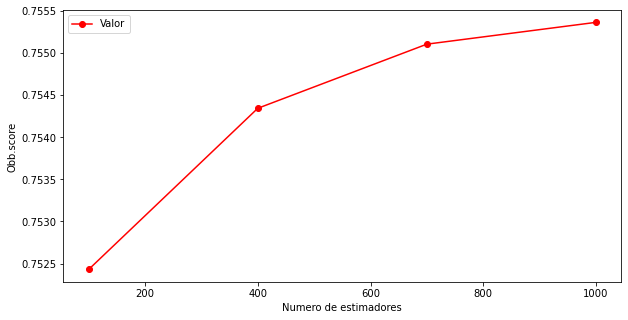

In [56]:
plt.figure(figsize=(10,5))
plt.plot(cantidad,obb_scores,'o-', color="r", label = "Valor")
plt.legend()
plt.ylabel('Obb.score')
plt.xlabel('Numero de estimadores')
plt.show()

<font color=#145A32 >Buscando optimizar el modelo, con el aumento de numero de estimadores y utilizando el obb_score para evitar el error de generalización, no logramos mejorar significativamente las metricas de error. Si existe una pequeña mejora luego de los 600 estimadores, pero casi imperceptible. </font>

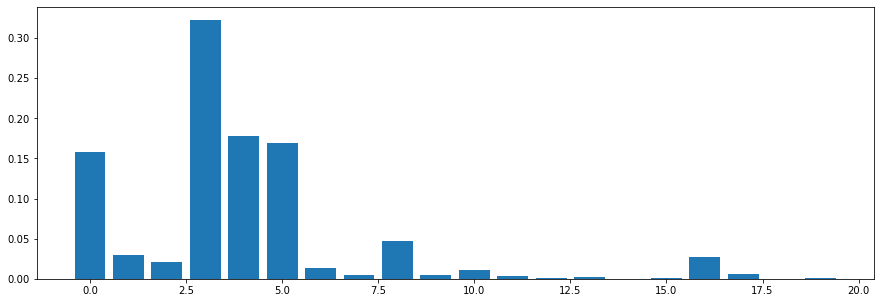

In [57]:
plt.figure(figsize=(15,5))
plt.bar(range(len(rt.feature_importances_)), rt.feature_importances_)
plt.show()

In [58]:
print("El atributo mas importante es: " + str(X_train.columns[3]))
print("El atributo el segundo es: " + str(X_train.columns[0]))
print("Lista de atributos por orden: " + str(X_train.columns[0:]))

El atributo mas importante es: bathrooms
El atributo el segundo es: l3
Lista de atributos por orden: Index(['l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'l2_Bs.As. G.B.A. Zona Norte',
       'l2_Bs.As. G.B.A. Zona Sur', 'l2_Capital Federal',
       'l2_Bs.As. G.B.A. Zona Oeste', 'property_type_Departamento',
       'property_type_Lote', 'property_type_Local comercial',
       'property_type_Casa', 'property_type_Casa de campo',
       'property_type_Otro', 'property_type_Depósito', 'property_type_PH',
       'property_type_Cochera', 'property_type_Oficina'],
      dtype='object')


#### Analizamos el error del modelo

C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abel_\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


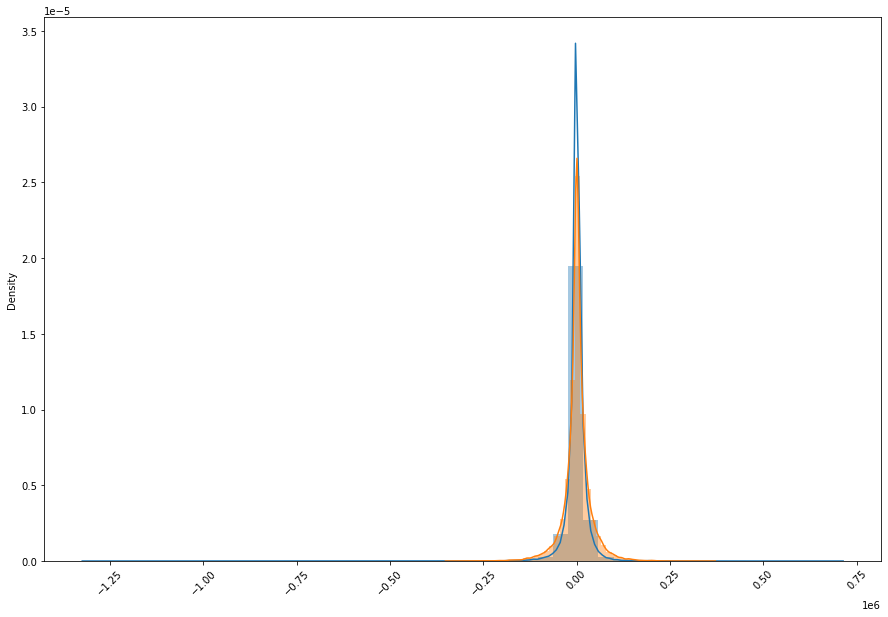

In [59]:
y_test_pred_np = np.array(y_test_pred) 
y_test_np = np.array(y_test)
y_train_pred_np = np.array(y_train_pred) 
y_train_np = np.array(y_train)

error_test = (y_test_pred_np - y_test_np)
error_train = (y_train_pred_np - y_train_np)

fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.distplot(error_train, hist=True)
sns.distplot(error_test, hist=True)
plt.xticks(rotation=45)
plt.show()

<font color=#145A32 >Lo primero que analizamos es ver en torno a donde gira el error, graficamente podemos ver que esta tiene su mayor localización en 0, con una función con mucha disperción. Inicialmente podemos deducir que el modelo tiene un buen comportamiento pero en una sección tiende a cometer un error de predicción grande</font>

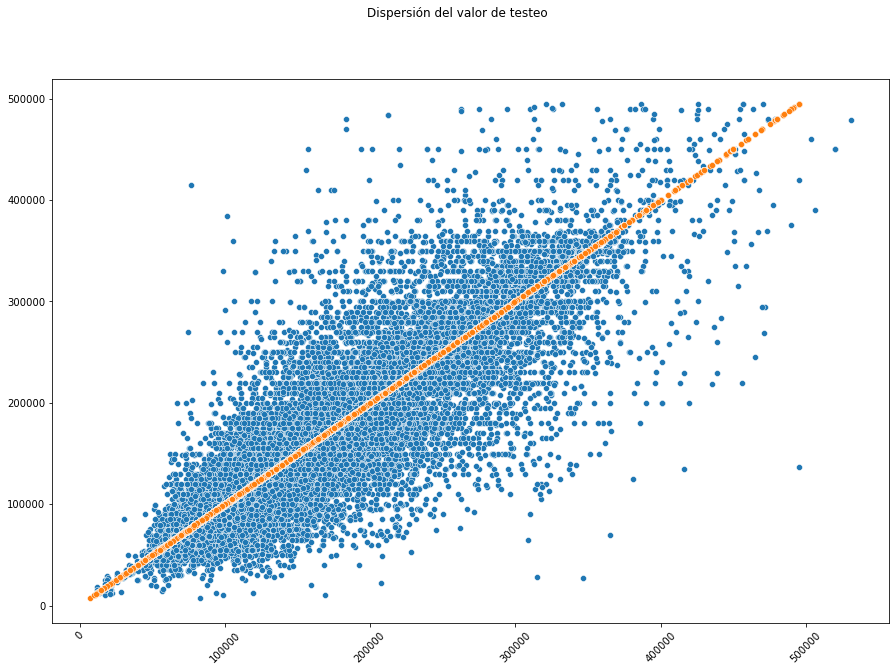

In [60]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
fig.suptitle('Dispersión del valor de testeo')
sns.scatterplot(x=y_test_pred_np, y=y_test_np)
sns.scatterplot(x=y_test_np, y=y_test_np)
plt.xticks(rotation=45)
plt.show()

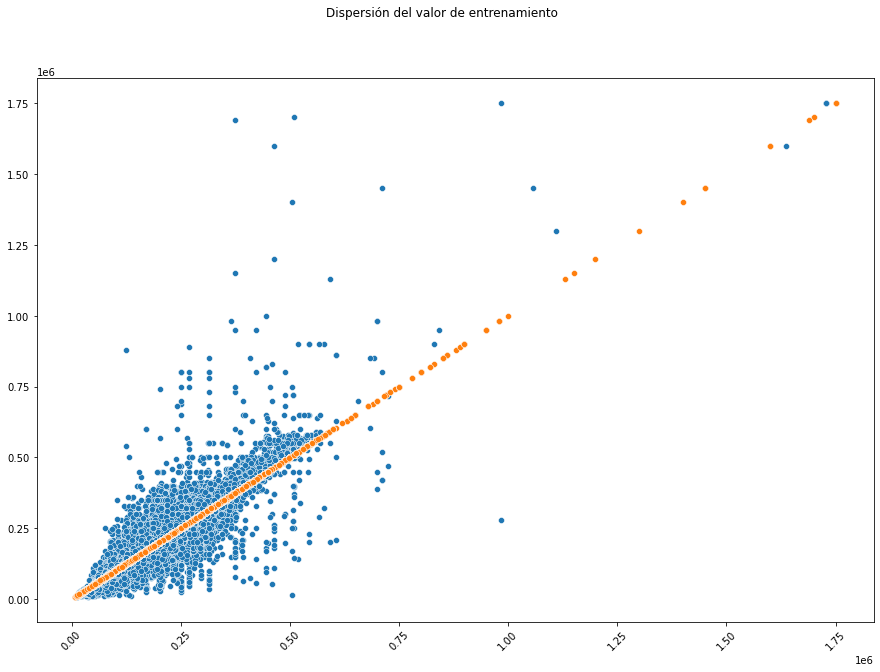

In [61]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
fig.suptitle('Dispersión del valor de entrenamiento')
sns.scatterplot(x=y_train_pred_np, y=y_train_np)
sns.scatterplot(x=y_train_np, y=y_train_np)
plt.xticks(rotation=45)
plt.show()

<font color=#145A32 >Podemos ver con estos graficos que el error tiende a ser similar tanto en testeo como en entrenamiento, mostrando una gran concentración torno al valor real cuando esta por debajo del medio millon, y luego tiene a generar mayor disperción</font>

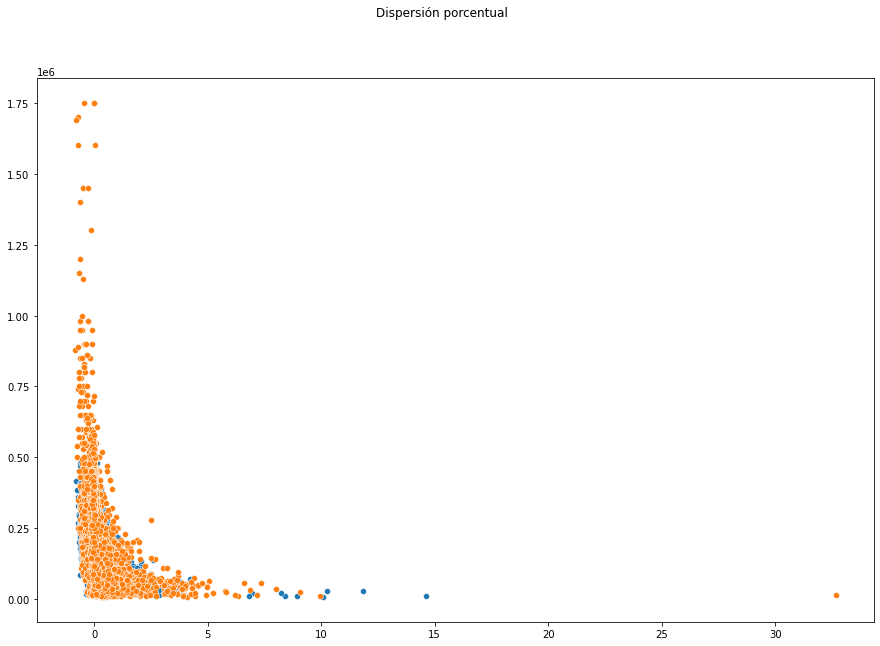

In [62]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
fig.suptitle('Dispersión porcentual')
sns.scatterplot(x=(y_test_pred_np - y_test_np)/y_test_np, y=y_test_np)
sns.scatterplot(x=(y_train_pred_np - y_train_np)/y_train_np, y=y_train_np)
plt.show()

<font color=#145A32 >Tomando la diferencia sobre el valor real, porcentualmente el error mas grande se encuentra en las unidades mas economicas. Aqui es donde nuestro modelo falla, en unidades de bajo costo. Esto puede ser capaz por el tipo de propiedad. Para descubrirlo haremos los graficos de desviación pero por propiedad</font>

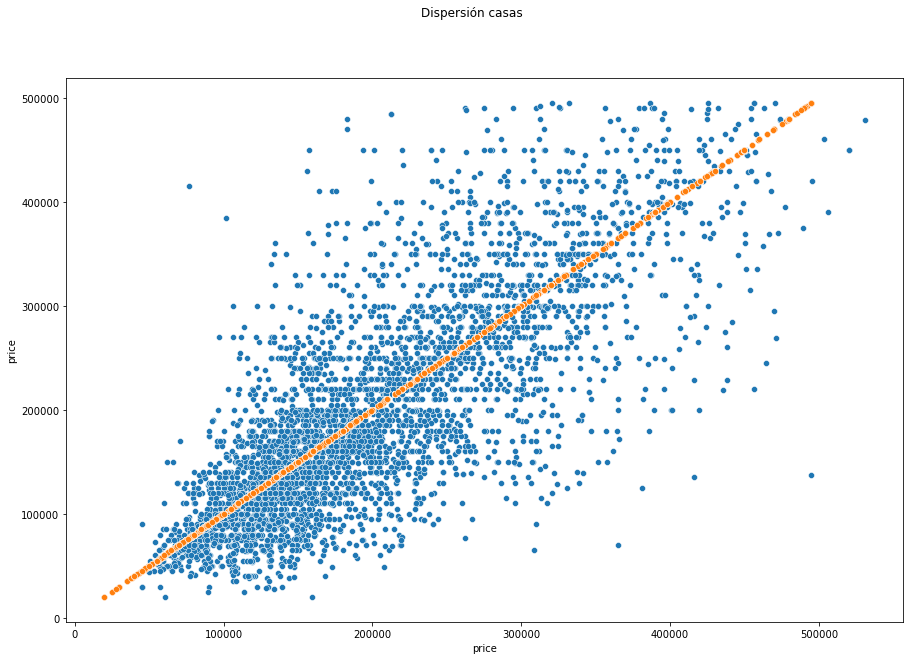

In [63]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
fig.suptitle('Dispersión casas')
sns.scatterplot(x=rt.predict(X_test[X_test['property_type_Casa'] == 1]), y=data_test[data_test['property_type_Casa'] == 1]['price'])
sns.scatterplot(x=data_test[data_test['property_type_Casa'] == 1]['price'], y=data_test[data_test['property_type_Casa'] == 1]['price'])
plt.show()


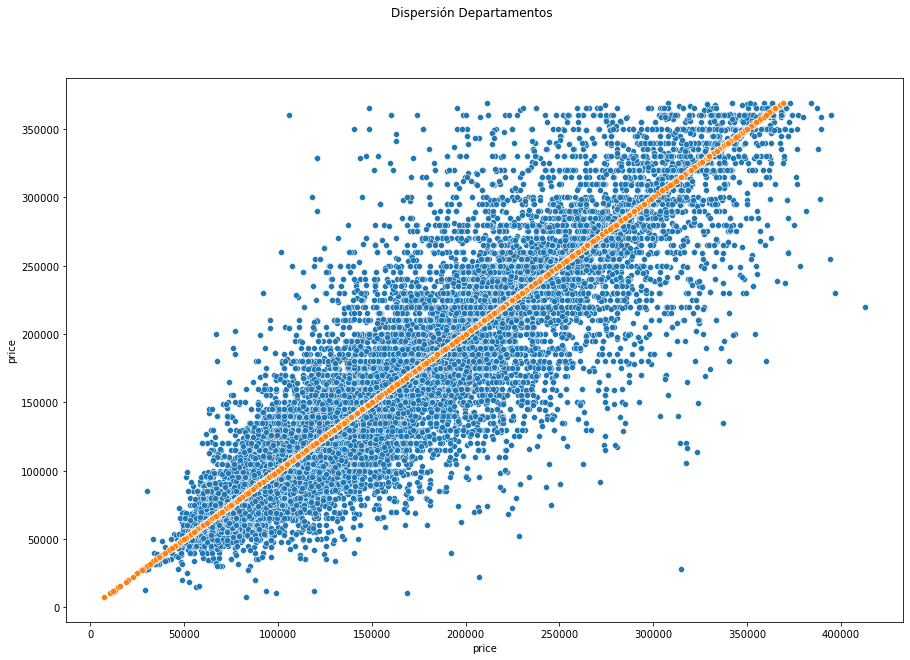

In [64]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
fig.suptitle('Dispersión Departamentos')
sns.scatterplot(x=rt.predict(X_test[X_test['property_type_Departamento'] == 1]), y=data_test[data_test['property_type_Departamento'] == 1]['price'])
sns.scatterplot(x=data_test[data_test['property_type_Departamento'] == 1]['price'], y=data_test[data_test['property_type_Departamento'] == 1]['price'])
plt.show()

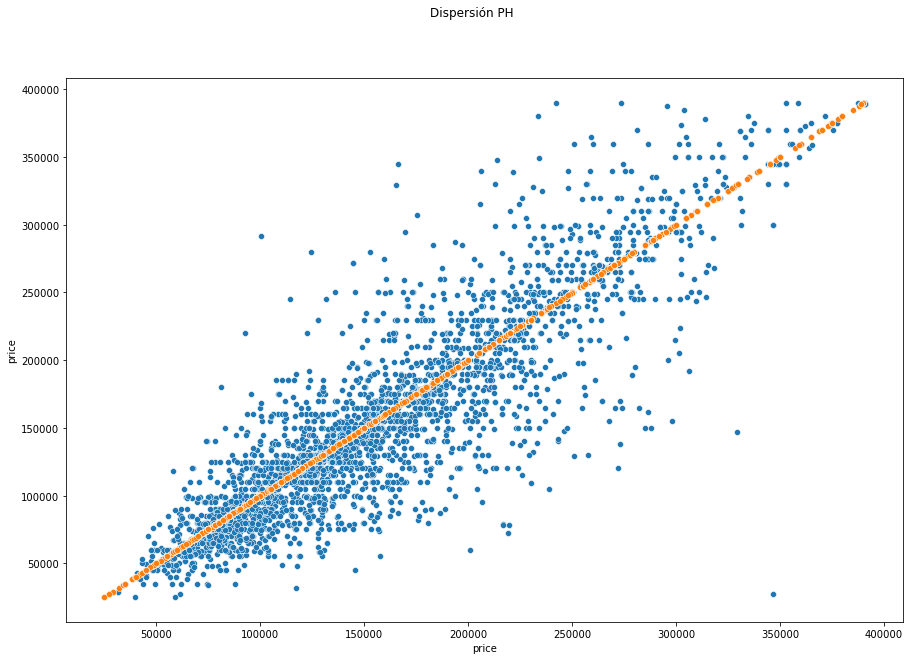

In [65]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
fig.suptitle('Dispersión PH')
sns.scatterplot(x=rt.predict(X_test[X_test['property_type_PH'] == 1]), y=data_test[data_test['property_type_PH'] == 1]['price'])
sns.scatterplot(x=data_test[data_test['property_type_PH'] == 1]['price'], y=data_test[data_test['property_type_PH'] == 1]['price'])
plt.show()

<font color=#145A32 >Analizando los graficos de dispersión de los datos de test, viendo la disperción y la escala de los valores podemos deducir que los departamentos son los tipo de propiedad que al modelo le cuesta predecir su precio.</font>

### PARTE C - Interpretación de los datos

#### Variables importantes 

<font color=#145A32 >En el random forest los atributos mas importantes fueron la cantidad de baños, L3 (la ubicación por barrio) y la superficies. Esto tiene mucho sentido ya que conociendo el mercado lo que mas define el precio de una propiedad es la superficie y su ubicación sobre otros datos, por otro lado la cantidad de baños puede ser un factor importanta al momento de determinar precios, ya que es una de las habitaciones mas costosas de construir por los elementos necesarios que se necesitan.</font>

#### El modelo a usar

<font color=#145A32 >Random forest fue el modelo con mejor resultado, con un error medio absoluto de 24.000 en test y en train cerca de 14.000. Si bien es el modelo que presento mayor overfitting, son errores entre un 6% a un 10% si tomamos la media de los datos del precio como parametro, siendo una diferencia baja porcentualmente baja a mi critero.</font>

#### Critica del modelo 

<font color=#145A32 >Inicialmente hay variables que no tienen mucha utilidad al momento de determinar el precio, principalmente los cuartos y los dormitorios, las mismas se podrian eliminar para tener una menor cantidad de datos sin afectar mucho el modelo. 
Sin embargo la critica mas importante en el procesamiento de los datos fue los criterios para eliminar registros. Al ser un dataset con tantos valores atipicos, el mejor tratamiento posiblemente seria reemplazar esos valores o hacerle un tratamiento diferente, ya que se elimino gran parte del dataset, aunque menor cantidad que en el proyecto numero 1</font>